# **Project Report**

# Using serum cholesterol and age achieved to diagnose heart disease patients from Cleveland.

**Quang Duy Do, Wendy Li, Lucia Lu, Jingjing Li**

## Introduction

The term “heart disease” refers to several types of heart conditions. The most common type of heart disease in the United States is coronary artery disease (CAD), which affects the blood flow to the heart. (Heart Disease Resources | Cdc.gov, 2023) Decreased blood flow can cause a heart attack.
Many factors contribute to heart disease, including blood pressure and cholesterol levels. (Know Your Risk for Heart Disease | cdc.gov, 2023) Age also has a potential influence on heart disease. Heart disease is primarily symptomatic when it occurs, but it can be prevented by everyday signs such as exercising for angina. (Professional, n.d.)

Too much LDL cholesterol in the blood causes plaque to build up in the arteries. The buildup cuts blood flow and leads to heart and blood vessel conditions. The LDL cholesterol level should be less than 130 mg/dL (3.4 mmol/L). (Blood Tests for Heart Disease, 2023)

This project aims to **predict a patient's likelihood of developing heart disease using factors such as age and cholesterol levels.**

We are using the processed.cleveland.data from the Heart Disease Database (originally collected from the Cleveland Clinic Foundation) to predict if a patient from Cleveland will have heart disease. The columns are as follows:

- 1.**age**: age
- 2.**sex**: sex (1 = male, 0 = female)
- 3.**cp**: chest pain type
- 4.**trestbps**: resting blood pressure in mmHg
- 5.**chol**: serum cholestoral in mg/dl
- 6.**fbs**: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
- 7.**restecg**: resting electrocardiographic results
- 8.**thalach**: maximum heart rate achieved
- 9.**exang**: whether exercise induced angina (1 = True, 0 = False)
- 10.**oldpeak**: ST depression induced by exercise, relative to rest
- 11.**slope**: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
- 12.**ca**: number of major vessels (0-3) coloured by flourosopy
- 13.**thal**: (3 = normal, 6 = fixed defect, 7 = reversable defect)
- 14.**num**: diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)

Based on the list above, we will be using `age`, and `chol` as predictors, to classify patients on whether or not they have heart disease.

## Methods

The methodology used in our project involves several steps, starting with preprocessing and exploratory data analysis to ensure data quality, then summarizing the data, where we assess whether age differences and cholesterol levels exist between the two classes. Subsequently, visualization techniques are employed to interpret data relationships. Next, we focus on finding the optimal value for k-nearest neighbors by creating a k-nearest neighbors (KNN) classifier. Lastly, the classifier is tested using evaluation metrics and external datasets to ensure its reliability in predicting heart disease diagnoses. This comprehensive approach thoroughly analyzes and validates our predictive model.

### Methods Breakdown:

#### Data Preprocessing and Exploratory data analysis
- Import libraries in R and download the processed.cleveland.data from the Heart Disease Database.

- Tidy the dataset by handling missing values and assigning appropriate column types to each variable.
  
- Add a new column named `diag` to represent the diagnosis of heart disease.

- Split the cleaned dataset into training and testing sets, reserving the testing set for final evaluation.

- Conduct exploratory data analysis on the training by using the functions `group_by` and `summarize`.

- Visualize the relationship between the variables `age` and `chol` (serum cholesterol) along with the diagnosis status.

### Finding the Best *k* Value 
- Apply feature scaling using the `recipe` function to center and scale the data.

- Create a k-nearest neighbors model using the `nearest_neighbor()` function with `neighbors = tune()` to find the optimal value of k.

- The training data evaluated model performance using ten-fold `vfold_cv`.

- Add the recipe and model to a workflow and use `tune_grid` to fit the model with a range of k values.

- Identify the best k value by filtering for accuracy and plotting a line graph with accuracy estimates against k values by using the function `geom_line`.

### Visualize the results
- Compare classifier's accuracy with a majority classifier by calculating the percentage of the most abundant class in the dataset.

- Build the final model with the chosen optimal k value and integrate it into the workflow with the recipe.

- Check for overfitting or underfitting by coloring the background of the graph based on predicted diagnoses at every possible point.

### Testing the Classifier
- Test the classifier's performance on the testing set by using `predict` function.

- Use the fitted model to make predictions on the test set and calculate their accuracy.

- Construct a confusion matrix to identify areas where the model might struggle to classify diagnoses with the `conf_mat` function.

- Further evaluate the classifier's accuracy by applying it to a secondary dataset(Switzerland dataset).

## Analysis and Results

### Loading in dataset and Preprocessing

After importing libraries, we can load the dataset into R from the original source on the web using `read_csv`. Preprocessing the dataset involves wrangling and cleaning. Wrangling can transform and map data from one "raw" data form into another format to make it more appropriate and valuable for various downstream purposes such as analytics. Cleaning can make sure the data is accurate and consistent. Here, the column names are identified, and the type of data and the "?" in the data are handled.

#### Importing Libraries and Setting Graph Format

In [3]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

# formatting graphs
options(repr.plot.width = 10, repr.plot.height = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

#### Importing dataset

We used `read_csv` to import the processed.cleveland.data dataset from the original source on the web. Through using `head` and `nrow`, we can get the basic information of the raw dataset.

In [5]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                          col_names = FALSE)

head(cleveland_data)

nrow(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

[1] 303

*figure 1*

Based on the basic information of the dataset, we can see that the column names need to be identified. And the type of columns, which are **dbl** and **chr**, also need to be changed.

#### Preprocessing data

The "?" appeared in the dataset, making some of the column types <chr>, which needs us to change those **"?" to NA**. Then, we can add each column's name and assign their types.

As we analyze whether a patient has heart disease, we add a **true/false column called diag** based on the value of num, which can be the column. If the value of num is larger than 0, the diag will be true, while num = 0 means false. 

Then, we calculate how many NA are in the dataset to identify whether it will affect our analysis.

In [6]:
set.seed(12)

cleveland_clean <- cleveland_data

# Adding column names:
# 1. Age
# 2. Sex
# 3. Cp
# 4. trestbps
# 5. chol
# 6. fbs
# 7. restcg
# 8. thalach
# 9. exang
# 10. oldpeak
# 11. slope
# 12. ca
# 13. thal
# 14. num

colnames(cleveland_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

# Tidy the data to make future processing more convenient
cleveland_clean <- cleveland_clean |>
                mutate(sex = as.factor(as.integer(sex)),
                       diag = as.factor(ifelse(is.na(num), NA, (num > 0))), # Add new "diag" column for diagnosis as either true (has diagnosis) or false (no diagnosis)
                      num = as.factor(as.integer(num))) # Since sex is a dummy variable that is either male(1) and female(0)

# changing "?" into NA so R recognizes these values
cleveland_clean[ cleveland_clean == "?" ] <- NA

head(cleveland_clean)

# seeing how many observations have NA to see if they will significantly affect the dataset
cleveland_na <- sum(is.na(cleveland_clean))
cleveland_na


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal num
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0  0  
2 67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0  2  
3 67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0  1  
4 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0  0  
5 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0  0  
6 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0  0  
  diag 
1 FALSE
2 TRUE 
3 TRUE 
4 FALSE
5 FALSE
6 FALSE

[1] 6

*figure 2*

In [7]:
# As there are only 6 obervations with NA, which is very small, we do not have to replace those NA with the mean
# Check the number of different distinct values of in num column
cleveland_see <- cleveland_clean |> distinct(diag)
cleveland_see

# Drop the NA so it doesn't interfere with future work
cleveland_clean <- drop_na(cleveland_clean)

diag 
1 FALSE
2 TRUE

*figure 3*

### Splitting the data

Splitting the data is important before working on the model. The purpose is to divide the dataset into two parts: one to **train a model (training set)** and the other to evaluate its **performance (testing set)**. This helps assess how well the model is expected to perform on unseen data, thus estimating the model's generalization ability.

Here, we use `initial_split` to split the dataset into a **75% training set and a 25% testing set** by stratifying the data by **diag** so that each set has an equal proportion of each. Allocating 75% of the data to training can ensure that the model has substantial data to learn from. A 25% testing set gives a reasonably large sample size to provide confidence in the performance metrics calculated, such as accuracy, precision, recall, etc. It ensures that the performance evaluation is robust and statistically significant.

In [8]:
set.seed(12)

# Splitting the dataset into a testing set and training set for training the classifier
cleveland_split <- initial_split(cleveland_clean, prop = 0.75, strata = diag)

cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

head(cleveland_train) # Previewing the first few rows of the training set

nrow(cleveland_train) # Checking the adequacy of the number of observations in the training set
nrow(cleveland_test) # Checking the adequacy of the number of observations in the testing set

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal num
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0  0  
2 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0  0  
3 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0  0  
4 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0  0  
5 57  0   4  120      354  0   0       163     1     0.6     1     0.0 3.0  0  
6 57  1   4  140      192  0   0       148     0     0.4     2     0.0 6.0  0  
  diag 
1 FALSE
2 FALSE
3 FALSE
4 FALSE
5 FALSE
6 FALSE

[1] 222

[1] 75

*figure 4*

According to the results, there are 222 rows (75%) in the training set and 75 rows (25%) in the testing set. These data are enough for us to train the classifier and test it later, which means our classifier is going to be reliable.

### Summarizing the data

Before we start to use the model for analysis, we need to check whether these two classes have different averages in age and serum cholesterol. We use `group_by` and `summarize` to get the results.

And we also use `filter` and `nrow` to compare the number of these two classes and ensure consistency of reference for both data classes.

In [22]:
# Looking at the average age of the training set
cleveland_summary <- cleveland_train |>
                    group_by(diag) |>
                    summarize(mean_chol = mean(chol),
                    mean_age = mean(age))

# Looking at the observations where no diagnosis was made
cleveland_false <- cleveland_train |>
                    filter(diag == "FALSE") |>
                    nrow()

# Looking at observations where diagnosis was made
cleveland_true <- cleveland_train |>
                    filter(diag == "TRUE") |>
                    nrow()

# Calculate the number of false in diagnosis
print("False Diag number:")
cleveland_false

# Calculate the number of true in diagnosis
print("True Diag number:")
cleveland_true

print("Summary:")
cleveland_summary

# These values are used to determine if upscaling is necessary

[1] "False Diag number:"


[1] 120

[1] "True Diag number:"


[1] 102

[1] "Summary:"


diag  mean_chol mean_age
1 FALSE 245.8583  52.53333
2 TRUE  248.7451  56.79412

*figure 5*

According to the table, we can find that patients with heart disease tend to **be older and have higher cholesterol values.** The results are also what we expect our classifier to predict diagnoses using later. In addition, the similar counts between true and false diagnoses help to prove our classifier is unlikely to be biased, and there is no need to `step_upsample()` the data in the recipe.

### Visualizing the relationship between predictors and class

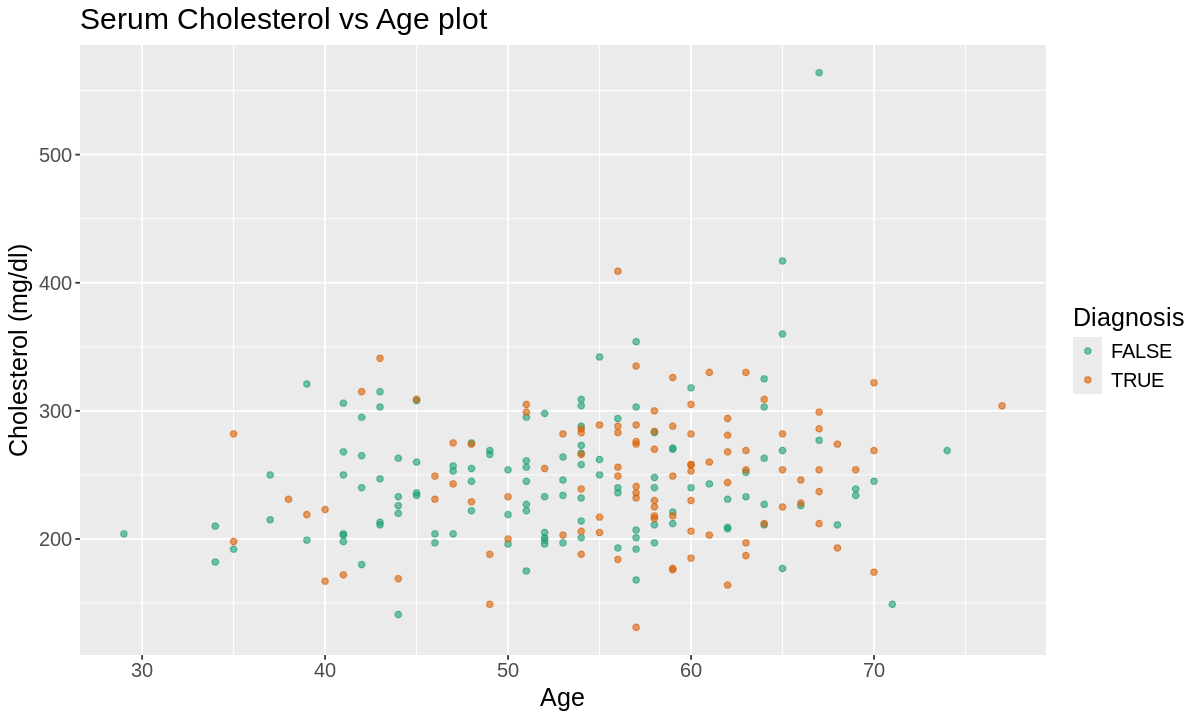

In [23]:
#plotting the training data
summary_plot <- ggplot(cleveland_train, aes(x = age, y = chol, color = diag)) +
                 geom_point(alpha = 0.6) +
                 labs(x = "Age", y = "Cholesterol (mg/dl)",
                      color = "Diagnosis", title = "Serum Cholesterol vs Age plot") +
                 scale_color_brewer(palette = "Dark2") +
                 theme(text = element_text(size = 15))

summary_plot

*figure 6*

According to the graph above, both two classes have a wide range of cholesterol levels, while patients with heart disease (Orange) tend to be older. This graph shows the spread out of the data and the outliers and allows us to make an initial guess at the conclusion.

### Finding the best  *k* value

#### Creating the model

To create our model, we need to follow four steps:

- 1.Create a **recipe** that uses cleveland_training to **predict diag, with chol and age as predictors**, while standaridizing the data.
- 2.Constructing **k-nearest neighbors model**, with `neighbors = tune()` to perform cross-validation.
- 3.Split the data into **10 equally sized chunks**, known as folds, stratifying by diag.
- 4.Specify a workflow combining the first 2 steps with `tune_grid`.
- 5.Repeat for each validation set for values of **1 ≤ k ≤ 100**.
- 6.Collect the metrics and results.

In [24]:
set.seed(12)

# Standardizing the data
cleveland_recipe <- recipe(diag ~ chol + age, data = cleveland_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

# Constructing K-nearest neightbour model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Perform 10 fold-cross validation
cleveland_fold <- vfold_cv(cleveland_train, v = 10, strata = diag)

gridv <- tibble(neighbors = c(1:100))

# Specify the workflow
knn_flow <- workflow() |>
        add_recipe(cleveland_recipe) |>
        add_model(knn_spec) |>
        tune_grid(resamples = cleveland_fold, grid = gridv)

# Collect the metrics and results
knn_results <- knn_flow |>
        collect_metrics() |>
        filter(.metric == "accuracy") |>
        select(neighbors, mean) |>
        arrange(-mean)

head(knn_results)

neighbors mean     
1 55        0.6347826
2 56        0.6347826
3 35        0.6258893
4 36        0.6258893
5 53        0.6258893
6 54        0.6258893

*figure 7*

Collecting the metrics and results shows that **both 55 and 56 have 63.478% accuracy**. To choose the best k, a line graph that shows the relationship between accuracy and k value is needed.

#### Visualizing the accuracy

By using `geom_line`, we will got a line graph that shows the relationship between accuracy and k value **(Accuracy vs. Neighbors)**.

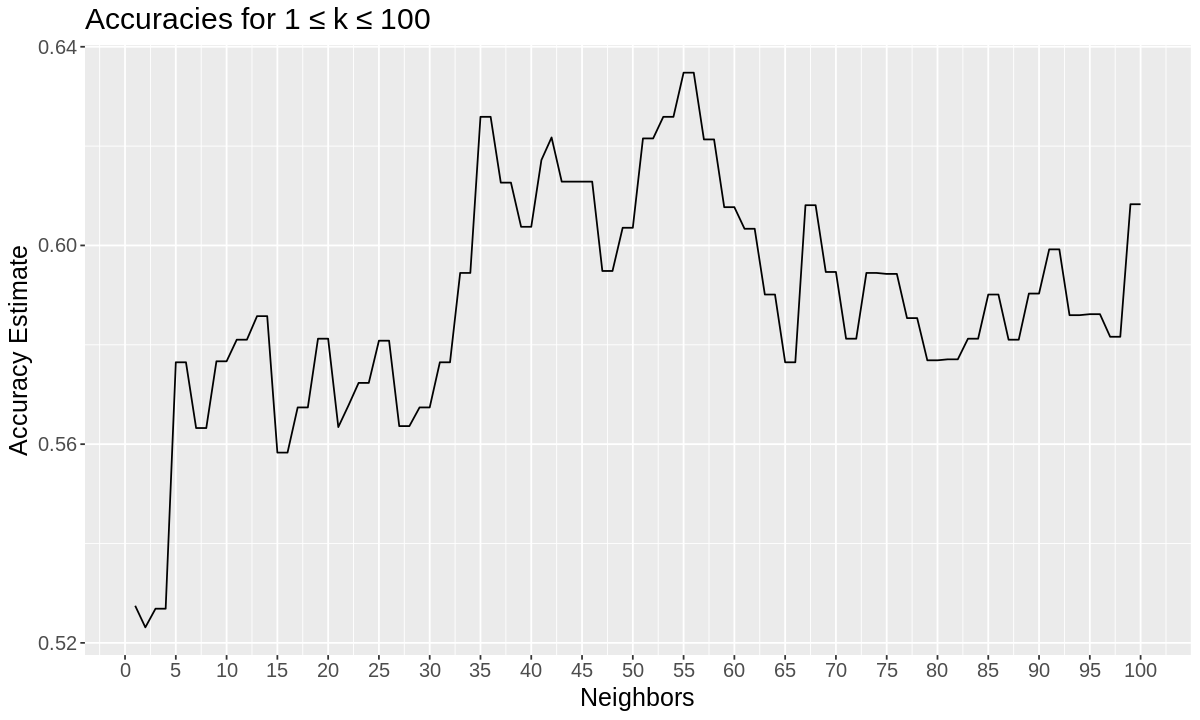

In [25]:
# Visualizing how the accuracy of the classifier changes with respect to a change in the number of neighbours
result_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
      theme(text = element_text(size = 15))

result_plot

*figure 8*

The graph above shows that accuracy fluctuates as k changes. There are peaks and valleys, indicating that some values of k result in better model performance than others. Here, we choose the highest accuracy estimate, which appears when **K = 55.**

### Comparing to a majority of classifier

Comparing a model to a majority class classifier is a crucial step in evaluating the classification algorithm's performance. To do this step, we need to use `group_by` and `summarize` to get the percentage of the most abundant class.

In [26]:
# Converting the number of observations into proportions for more explicit comparison
cleveland_proportion <- cleveland_train |>
        group_by(diag) |>
        summarize(n=n()) |>
        mutate(percentage = 100 * n / nrow(cleveland_train))

cleveland_proportion

diag  n   percentage
1 FALSE 120 54.05405  
2 TRUE  102 45.94595

*figure 9*

The table above shows that the FALSE diagnosis represents most of the training data, **54.05% of all results**, indicating that our class proportions were roughly preserved when we split the data.

### Building the final working model

We have decided to use the best **K = 55**, which means we can build our final model using neighbors = 55. Now, we repeat the previous steps and fit them into **cleveland_train.**

In [27]:
set.seed(12)

# Creating a K-nn model with the chosen best K value
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 55) |>
        set_engine("kknn") |>
        set_mode("classification")

# Making recipe, including specifying and standardizing predictors
final_recipe <- recipe(diag ~ chol + age, data = cleveland_train) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

# Fit the model and recipe with the training set into the workflow
final_fit <- workflow() |>
        add_recipe(final_recipe) |>
        add_model(final_spec) |>
        fit(data = cleveland_train)
final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(55,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3873874
Best kernel: rectangular
Best k: 55

Now we have a working model!

### Checking for over/underfitting

Both overfitting and underfitting are problematic and will lead to a model that does not generalize well to new data. When fitting a model, we need to strike a balance between the two. So, we need to check whether our model is overfitting by visualizing the regions that the model has assigned to each class.

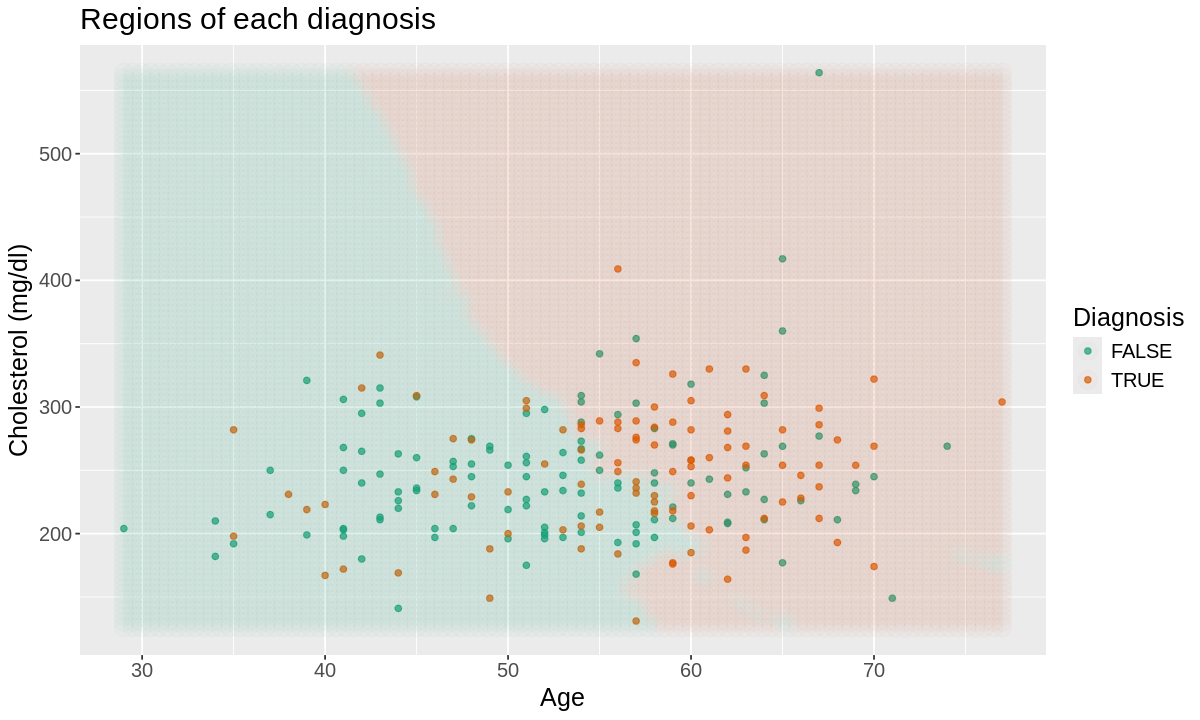

In [28]:
set.seed(12)

# Make the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 55) |>
    set_engine("kknn") |>
    set_mode("classification")

# Combine the model and recipe in a workflow, retrain the classifier with fit
fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(knn_spec) |>
    fit(data = cleveland_train)

# Graph with coloured background to check for overfitting/underfitting

age_grid <- seq(min(cleveland_clean$age), 
                max(cleveland_clean$age), 
                length.out = 100)

chol_grid <- seq(min(cleveland_clean$chol), 
                max(cleveland_clean$chol), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(age = age_grid, 
                                chol = chol_grid))

knnPredGrid <- predict(fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
                    rename(diag = .pred_class)

# Visualizing the results to determine possible overfitting/underfitting
plot_results <- ggplot() + 
                geom_point(data = cleveland_train, 
                mapping = aes(x = age, y = chol, color = diag), 
                alpha = 0.7) +
                geom_point(data = prediction_table, 
                           mapping = aes(x = age, 
                           y = chol, 
                           color = diag), 
                           alpha = 0.02, 
                           size = 5) +
                labs(x = "Age", y = "Cholesterol (mg/dl)", 
                     color = "Diagnosis", 
                     title = "Regions of each diagnosis") +
                scale_color_brewer(palette = "Dark2") +
                theme(text = element_text(size = 15))

plot_results

*figure 10*

According to the graph above, the training data appropriately influences the model, which means that the classifier is **neither underfitting nor overfitting**. In this situation, we can trust that our classifier will be able to predict new data.

### Testing classifier

#### Accuracy and confusion matrix

After deciding whether our classifier is reliable, we can use the testing set to evaluate its performance when used to predict new data.

Here the same fit will be used as before, but we will fit them into **cleveland_test**. We will use metrics and a confusion matrix by using `metrics` and `conf_mat` to evaluate its accuracy.

In [29]:
set.seed(12)

# Testing the classifier by predicting on the test set 
predictions <- predict(fit, cleveland_test) |>
               bind_cols(cleveland_test)

# Find the accuracy of the predictions
metrics<- predictions |>
    metrics(truth = diag, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

# Constructing a confusion matrix and identifying the areas the model is weak at classifying
conf_mat<- predictions |>
    conf_mat(truth = diag, estimate = .pred_class)
conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.6133333

          Truth
Prediction FALSE TRUE
     FALSE    26   15
     TRUE     14   20

*figure 11*

The metrics show that the classifier was **61.33% accurate**, which means 46 out of 75 observations are correct.

According to the confusion matrix, 14 observations were classified as TRUE when they were actually FALSE, and 15 observations were classified as FALSE when they were actually TRUE. Overall, most of the observations are correct. This effectively illustrates the effectiveness and dependability of our classifier, further demonstrating its availability for new data.

#### Testing the versatility of classifier

To further test our classifier's accuracy, we will use another dataset. This time, we will use the **processed.switzerland.data** dataset as a secondary testing set. This can help us identify whether the classifier can be used in different countries' medical systems.

We first import the dataset and preprocess it to make it earier for analysis.

In [30]:
# Read the Switzerland dataset into R
switzerland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",
                            col_names = FALSE)


# Adding names to columns like before
colnames(switzerland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
                           
# Changing "?" into NA
switzerland_data[ switzerland_data == "?" ] <- NA

# Adding diag column, setting col types
# as.integer is being used to eliminate decimal points when switching to factor
switzerland_clean <- switzerland_data |>
                    mutate(diag = as.factor(ifelse(is.na(num), NA, (num > 0)))) %>%
                    mutate(thalach = as.double(thalach), chol = as.double(chol)) %>%
                    filter(chol != "NA",
                          age != "NA")

# Previewing the clean dataset and checking the number of observations
head(switzerland_clean)
nrow(switzerland_clean)

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal num
1 32  1   1  95       0    NA  0       127     0     .7      1     NA NA   1  
2 34  1   4  115      0    NA  NA      154     0     .2      1     NA NA   1  
3 35  1   4  NA       0    NA  0       130     1     NA      NA    NA 7    3  
4 36  1   4  110      0    NA  0       125     1     1       2     NA 6    1  
5 38  0   4  105      0    NA  0       166     0     2.8     1     NA NA   2  
6 38  0   4  110      0    0   0       156     0     0       2     NA 3    1  
  diag
1 TRUE
2 TRUE
3 TRUE
4 TRUE
5 TRUE
6 TRUE

[1] 123

*figure 12*

We processed the data according to the same rule, changing "?" to NA, assigning column types, and adding a diag column based on the value of num. And we can find that the dataset is smaller than the cleveland dataset, which only has 123 rows.

#### Testing classifier on the Switzerland dataset

Then, we test the classifier on the Switzerland dataset and see how accurate our final model is when using the new dataset for predicting diagnoses. We still use metrics and a confusion matrix by using `metrics` and `conf_mat` to evaluate its accuracy.

In [15]:
# Using the final model on the new dataset to predict diagnoses
switzerland_predictions <- predict(fit, switzerland_clean) |>
                      bind_cols(switzerland_clean)

# Determine the accuracy of the predictions
metrics<- switzerland_predictions |>
    metrics(truth = diag, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

metrics

# Creating the confusion matrix and identifying the areas that the model is weak at classifying
conf_mat<- switzerland_predictions |>
    conf_mat(truth = diag, estimate = .pred_class)
conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.2682927

          Truth
Prediction FALSE TRUE
     FALSE     6   88
     TRUE      2   27

*figure 13*

According to the metrics, the classifier's accuracy when using a new dataset is very low **(26.83%)**. In this situation, we can conclude that **our model is difficult to use widely in different countries**. The degree of the classifier's reliability strongly depends on the training data. The classifier can only be used for the location where we got the training data. As the training data we use is **cleveland_test**, we can only use this classifier to predict heart disease in Cleveland.

## Discussion

Our project aims to predict a patient's likelihood of developing heart disease using factors such as age and cholesterol levels by employing classification model. Generally, the analysis indicates that age and serum cholesterol levels are notable predictors of heart disease. Patients with heart disease tend to be older and have higher cholesterol levels.

The preliminary findings indicate a slight increase in average cholesterol levels and a noticeable difference in mean age between patients diagnosed with heart disease and those without. Based on the scatter plot, there is an overlap in cholesterol levels among both diagnosed and non-diagnosed individuals across various ages, suggesting a slight trend indicating that patients with heart disease may have slightly higher cholesterol levels, especially in older age groups. There seems to be a concentration of individuals diagnosed with heart disease (TRUE) within the older age brackets, which indicates that the risk of heart disease generally increases with age.

Our results show the highest accuracy of approximately 63.48% when k = 55, demonstrating a moderate accuracy in predicting heart disease diagnoses on the Cleveland dataset. Also, it is not prone to overfitting or underfitting. However, when tested on a new dataset from Switzerland, its performance significantly declined, indicating limitations in its generalizability across different populations and healthcare systems. 








#### Expected Outcomes vs. Our Findings

We expected that a person's age and cholesterol levels would be clear indicators of heart disease, and we hoped that our model would be efficient at distinguishing between those who had heart disease and those who didn't, regardless of where we used it. Our analysis did confirm that older people and those with higher cholesterol levels are more likely to have heart disease. However, upon analyzing the data, we noticed that people's cholesterol levels overlapped significantly, whether or not they had heart disease. This suggests that just using age and cholesterol to predict heart disease might not work as well as we thought.

The accuracy peak at a k-value on the Cleveland dataset shows moderate success in the model's predictive capability, as we expected the accuracy would be approximately above 60%. Nevertheless, the stark decrease in performance on the Switzerland dataset highlights the model's constrained generalizability, suggesting that it is less effective when applied to the dataset in another country. This is not what we expected, indicating that our model may be too specific to the data it was trained on and not flexible enough to handle new data from other places. 

#### Impacts of our findings

The classification model helps to identify the associations between factors such as age, cholesterol, and heart disease, enabling it to distinguish individuals with heart disease from those without it more accurately. As a result, timely intervention for heart disease becomes possible, leading to more accurate assessments. Moreover, the classification model reduces the diagnosis time for heart disease and greatly enhances the efficiency of the medical system.

#### Possible questions that may be led in the future:

1. What other factors besides the variables in our study could constitute heart disease?
2. How specific age groups are associated with heart disease?
3. How do cholesterol levels change over time, and tracking their patterns helps diagnose heart disease?
4. How does the frequency of exercise-induced angina relate to the likelihood of a diagnosis of heart disease?

## Bibliography

- Blood tests for heart disease. (2023, December 9). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/in-depth/heart-disease/art-20049357
- Heart disease resources | Cdc.gov. (2023, May 15). Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/about.htm
- Know your risk for heart disease | cdc.gov. (2023, March 21). Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/risk_factors.htm
- Professional, C. C. M. (n.d.). Angina. Cleveland Clinic. https://my.clevelandclinic.org/health/diseases/21489-angina
- Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.